In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt 
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns

# Varios
# ==============================================================================
from datetime import date
import json
import re


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Lectura de datos

In [2]:
partidos = pd.read_csv("matches_1.csv")
partidos

,Match_id,Date,Time,Wk,Home_id,Away_id,ScoreHome,ScoreAway,League_name,Round
0,4df3a732,2022-09-17,12:00,2,15f49df1,4c088abe,2,0,Liga-F,NaN
1,87c755cd,2022-09-17,12:00,2,aa11fb42,89818574,1,2,Liga-F,NaN
2,abfde9d9,2022-09-17,16:00,2,c21f25d3,7a7bef84,2,0,Liga-F,NaN
3,d0329f46,2022-09-17,16:00,2,54582b93,f96ff499,2,0,Liga-F,NaN
4,f4452586,2022-09-17,18:00,2,215d9026,b56c2667,1,3,Liga-F,NaN
...,...,...,...,...,...,...,...,...,...,...
638,ff64b21d,2023-04-16,14:30,4,613577b8,c99ff6e5,4,3,Serie-A,Championship group
639,29c06f13,2023-04-22,12:30,5,54da9a57,06d05f19,3,1,Serie-A,Championship group
640,a48fa81a,2023-04-22,14:30,5,02f8d026,613577b8,3,2,Serie-A,Championship group
641,47c32605,2023-04-23,12:30,5,58e367c3,9f18ced7,4,1,Serie-A,Relegation group


In [3]:
partidos.dtypes

Match_id       object
Date           object
Time           object
Wk              int64
Home_id        object
Away_id        object
ScoreHome       int64
ScoreAway       int64
League_name    object
Round          object
dtype: object

In [4]:
partidos["Goles Tot"] = partidos["ScoreHome"] + partidos["ScoreAway"]
partidos

,Match_id,Date,Time,Wk,Home_id,Away_id,ScoreHome,ScoreAway,League_name,Round,Goles Tot
0,4df3a732,2022-09-17,12:00,2,15f49df1,4c088abe,2,0,Liga-F,NaN,2
1,87c755cd,2022-09-17,12:00,2,aa11fb42,89818574,1,2,Liga-F,NaN,3
2,abfde9d9,2022-09-17,16:00,2,c21f25d3,7a7bef84,2,0,Liga-F,NaN,2
3,d0329f46,2022-09-17,16:00,2,54582b93,f96ff499,2,0,Liga-F,NaN,2
4,f4452586,2022-09-17,18:00,2,215d9026,b56c2667,1,3,Liga-F,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...
638,ff64b21d,2023-04-16,14:30,4,613577b8,c99ff6e5,4,3,Serie-A,Championship group,7
639,29c06f13,2023-04-22,12:30,5,54da9a57,06d05f19,3,1,Serie-A,Championship group,4
640,a48fa81a,2023-04-22,14:30,5,02f8d026,613577b8,3,2,Serie-A,Championship group,5
641,47c32605,2023-04-23,12:30,5,58e367c3,9f18ced7,4,1,Serie-A,Relegation group,5


In [5]:
media_por_liga = partidos.groupby(["League_name"]).mean()["Goles Tot"]
#media_por_liga["Liga"] = media_por_liga.index
media_por_liga

League_name
Division-1-Feminine    2.964912
Frauen-Bundesliga      3.093458
Liga-F                 3.270531
Serie-A                3.209091
Womens-Super-League    3.247619
Name: Goles Tot, dtype: float64

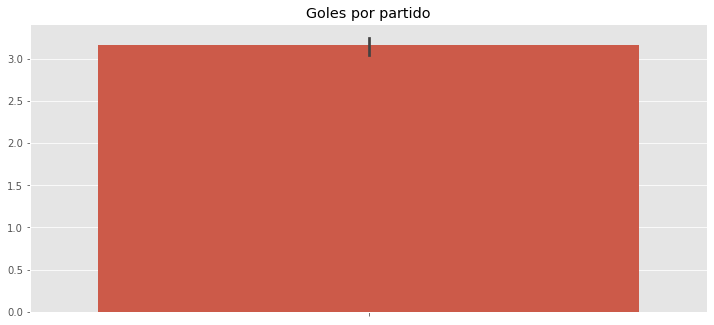

In [6]:
f, axes = plt.subplots(figsize = (8,5))
axes = sns.barplot(y = media_por_liga.values, hue = media_por_liga.index)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1.3, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
plt.title("Goles por partido")
plt.show()

## Valores nulos

In [7]:
print('Numero de nulos totales del dataset: {}'.format(partidos.isnull().sum().sum()))
partidos.isnull().sum()

Numero de nulos totales del dataset: 533


Match_id         0
Date             0
Time             0
Wk               0
Home_id          0
Away_id          0
ScoreHome        0
ScoreAway        0
League_name      0
Round          533
Goles Tot        0
dtype: int64

In [8]:
np.unique(partidos["Wk"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64)

## Jugadores

In [28]:
jugadores = pd.read_csv("players_1.csv").loc[:, ["Player_id", "Player", "Squad_id", "Nation", "Pos", "Age", "Born", "MP", "Min", "Gls", "Ast", "PK", "CrdY", "CrdR", "SoT", "Passes_Cmp", "Tkl", "Blocks", "Fls", "Fld", "Off", "PKcon", "Recov"]]
jugadores

,Player_id,Player,Squad_id,Nation,Pos,Age,Born,MP,Min,Gls,...,CrdR,SoT,Passes_Cmp,Tkl,Blocks,Fls,Fld,Off,PKcon,Recov
0,46f75f0c,Teresa Abilleira,54582b93,es ESP,MF,23.0,2000,20,1147,3,...,0,8.0,701.0,35.0,13.0,20.0,19.0,0.0,0.0,98.0
1,72c566fe,Jessica Aby,aa11fb42,ci CIV,"MF,FW",24.0,1998,17,548,1,...,1,5.0,113.0,14.0,3.0,32.0,14.0,2.0,0.0,34.0
2,67a39a11,Charity Adule,e9fecaf2,NaN,"FW,MF",29.0,1993,9,171,0,...,0,0.0,20.0,5.0,4.0,1.0,4.0,1.0,0.0,12.0
3,a097ef45,Júlia Aguado,0f4738a8,NaN,"FW,MF",22.0,2000,15,119,3,...,0,4.0,25.0,1.0,1.0,4.0,1.0,4.0,0.0,7.0
4,150b2d3b,Yolanda Aguirre,215d9026,es ESP,GK,24.0,1998,5,450,0,...,0,0.0,94.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,7b5f621b,Carina Wenninger,02f8d026,at AUT,DF,32.0,1991,19,1557,1,...,0,5.0,816.0,28.0,19.0,11.0,6.0,1.0,1.0,81.0
1526,138ec67d,Annie Williams,f7d05cb5,us USA,DF,25.0,1997,11,602,0,...,0,1.0,162.0,17.0,10.0,5.0,10.0,0.0,0.0,56.0
1527,9a69ea30,Annahita Zamanian,613577b8,fr FRA,"MF,FW",25.0,1998,10,142,1,...,0,3.0,77.0,1.0,0.0,2.0,3.0,0.0,0.0,10.0
1528,9a69ea30,Annahita Zamanian,c99ff6e5,fr FRA,MF,25.0,1998,6,455,2,...,1,2.0,119.0,10.0,8.0,7.0,3.0,1.0,0.0,26.0


In [29]:
jugadores = partidos[["Home_id", "League_name"]].merge(jugadores, left_on="Home_id",right_on= "Squad_id")
jugadores

,Home_id,League_name,Player_id,Player,Squad_id,Nation,Pos,Age,Born,MP,...,CrdR,SoT,Passes_Cmp,Tkl,Blocks,Fls,Fld,Off,PKcon,Recov
0,15f49df1,Liga-F,f3d165f5,Aitana Bonmatí,15f49df1,es ESP,MF,25.0,1998,20,...,0,27.0,877.0,20.0,8.0,6.0,13.0,8.0,0.0,96.0
1,15f49df1,Liga-F,5056c581,Lucy Bronze,15f49df1,eng ENG,DF,31.0,1991,20,...,0,9.0,973.0,46.0,14.0,17.0,14.0,5.0,0.0,106.0
2,15f49df1,Liga-F,59da315a,Mariona Caldentey,15f49df1,es ESP,"FW,MF",27.0,1996,15,...,0,14.0,743.0,15.0,7.0,3.0,16.0,4.0,0.0,71.0
3,15f49df1,Liga-F,607dd291,Alba Caño,15f49df1,NaN,MF,19.0,2003,1,...,0,1.0,28.0,2.0,0.0,3.0,0.0,0.0,0.0,4.0
4,15f49df1,Liga-F,1efbd058,Laia Codina,15f49df1,es ESP,DF,23.0,2000,11,...,0,0.0,520.0,6.0,8.0,6.0,3.0,0.0,0.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398062,f7d05cb5,Serie-A,cc6ed17f,Erika Santoro,f7d05cb5,it ITA,DF,23.0,1999,19,...,0,4.0,503.0,45.0,15.0,15.0,16.0,0.0,0.0,119.0
398063,f7d05cb5,Serie-A,69851edc,Ludovica Silvioni,f7d05cb5,it ITA,MF,21.0,2002,7,...,0,1.0,84.0,10.0,4.0,6.0,4.0,0.0,0.0,29.0
398064,f7d05cb5,Serie-A,6ccca92a,Liucija Vaitukaitytė,f7d05cb5,lt LTU,"MF,FW",23.0,2000,5,...,0,2.0,42.0,6.0,3.0,1.0,1.0,0.0,0.0,8.0
398065,f7d05cb5,Serie-A,66cf01c1,Giulia Verrino,f7d05cb5,it ITA,FW,19.0,2004,1,...,0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
jugadores_de_campo = jugadores[jugadores["Pos"] != "GK"]
jugadores_de_campo

,Home_id,League_name,Player_id,Player,Squad_id,Nation,Pos,Age,Born,MP,...,CrdR,SoT,Passes_Cmp,Tkl,Blocks,Fls,Fld,Off,PKcon,Recov
0,15f49df1,Liga-F,f3d165f5,Aitana Bonmatí,15f49df1,es ESP,MF,25.0,1998,20,...,0,27.0,877.0,20.0,8.0,6.0,13.0,8.0,0.0,96.0
1,15f49df1,Liga-F,5056c581,Lucy Bronze,15f49df1,eng ENG,DF,31.0,1991,20,...,0,9.0,973.0,46.0,14.0,17.0,14.0,5.0,0.0,106.0
2,15f49df1,Liga-F,59da315a,Mariona Caldentey,15f49df1,es ESP,"FW,MF",27.0,1996,15,...,0,14.0,743.0,15.0,7.0,3.0,16.0,4.0,0.0,71.0
3,15f49df1,Liga-F,607dd291,Alba Caño,15f49df1,NaN,MF,19.0,2003,1,...,0,1.0,28.0,2.0,0.0,3.0,0.0,0.0,0.0,4.0
4,15f49df1,Liga-F,1efbd058,Laia Codina,15f49df1,es ESP,DF,23.0,2000,11,...,0,0.0,520.0,6.0,8.0,6.0,3.0,0.0,0.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398062,f7d05cb5,Serie-A,cc6ed17f,Erika Santoro,f7d05cb5,it ITA,DF,23.0,1999,19,...,0,4.0,503.0,45.0,15.0,15.0,16.0,0.0,0.0,119.0
398063,f7d05cb5,Serie-A,69851edc,Ludovica Silvioni,f7d05cb5,it ITA,MF,21.0,2002,7,...,0,1.0,84.0,10.0,4.0,6.0,4.0,0.0,0.0,29.0
398064,f7d05cb5,Serie-A,6ccca92a,Liucija Vaitukaitytė,f7d05cb5,lt LTU,"MF,FW",23.0,2000,5,...,0,2.0,42.0,6.0,3.0,1.0,1.0,0.0,0.0,8.0
398065,f7d05cb5,Serie-A,66cf01c1,Giulia Verrino,f7d05cb5,it ITA,FW,19.0,2004,1,...,0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
def quedarse_posiciones(posiciones):
    if "DF" in posiciones:
        return "Defensa"
    elif "MF" in posiciones:
    	return "Centrocampista"
    elif "FW" in posiciones:
    	return "Delantero"

In [32]:
jugadores_de_campo["Pos"] = jugadores_de_campo["Pos"].apply(quedarse_posiciones)

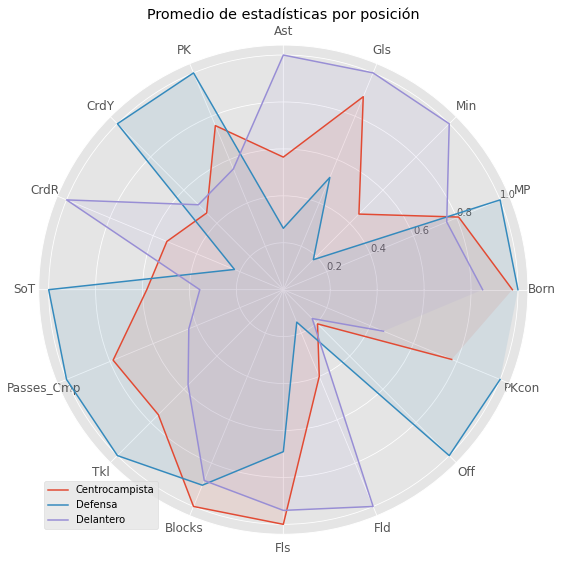

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
#stats_por_posicion = jugadores_de_campo.groupby("Pos")[["MP", "Min", "Gls", "Ast", "PK", "CrdY", "CrdR", "SoT", "Passes_Cmp", "Tkl", "Blocks", "Fls", "Fld", "Off", "PKcon", "Recov"]].mean()
# Crear un diccionario vacío para almacenar los datos de cada posición
posiciones = {}

# Iterar sobre cada posición y almacenar los datos en el diccionario
for posicion in jugadores_de_campo.Pos.unique():
    df_posicion = jugadores_de_campo[jugadores_de_campo["Pos"] == posicion].drop(columns=["Home_id", "League_name", "Player_id", "Player", "Squad_id", "Nation", "Pos", "Age", "Born"])
    #df_posicion = jugadores_de_campo[jugadores_de_campo["Pos"] == posicion].loc[:, ["MP", "Min", "Gls", "Ast", "PK", "CrdY", "CrdR", "SoT", "Passes_Cmp", "Tkl", "Blocks", "Fls", "Fld", "Off", "PKcon", "Recov"]]
    posiciones[posicion] = df_posicion.mean()

# Convertir el diccionario en un DataFrame
df_posiciones = pd.DataFrame(posiciones).T

nombres_stats = list(df_posiciones.columns)

# Calcular el valor máximo de cada columna para ajustar el eje de cada radar
max_values = df_posiciones.max()

# Crear la figura de matplotlib con subplots
fig, ax = plt.subplots(subplot_kw={"projection": "polar"}, figsize = (9,9))

# Crear un radar para cada posición y superponerlos en la misma figura
for i, row in df_posiciones.iterrows():
    theta = [2 * i * 3.14159 / len(row) for i in range(len(row))]
    plt.xticks(theta, nombres_stats)
    ax.plot(theta, row / max_values, label=i)

    ax.fill(theta, row / max_values, alpha=0.1)
    ax.set_xticklabels(jugadores_de_campo.columns[8:-1], fontsize=12)


# Configurar el título y la leyenda de la figura
ax.set_title("Promedio de estadísticas por posición")
ax.legend()

plt.savefig("Promedio de estadísticas por posición.jpeg")

plt.show()

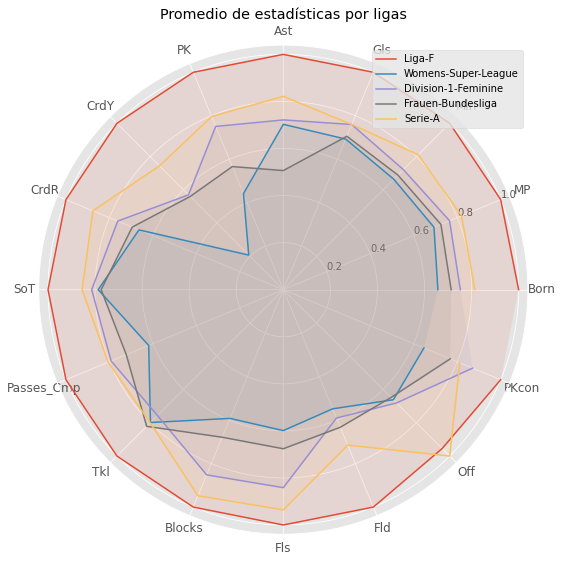

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
#stats_por_posicion = jugadores_de_campo.groupby("Pos")[["MP", "Min", "Gls", "Ast", "PK", "CrdY", "CrdR", "SoT", "Passes_Cmp", "Tkl", "Blocks", "Fls", "Fld", "Off", "PKcon", "Recov"]].mean()
# Crear un diccionario vacío para almacenar los datos de cada posición
ligas = {}

# Iterar sobre cada posición y almacenar los datos en el diccionario
for liga in jugadores_de_campo.League_name.unique():
    df_ligas = jugadores_de_campo[jugadores_de_campo["League_name"] == liga].drop(columns=["League_name", "Player_id", "Player", "Squad_id", "Nation", "Pos", "Age", "Born"])
    #df_posicion = jugadores_de_campo[jugadores_de_campo["Pos"] == posicion].loc[:, ["MP", "Min", "Gls", "Ast", "PK", "CrdY", "CrdR", "SoT", "Passes_Cmp", "Tkl", "Blocks", "Fls", "Fld", "Off", "PKcon", "Recov"]]
    ligas[liga] = df_ligas.mean()

# Convertir el diccionario en un DataFrame
df_ligas = pd.DataFrame(ligas).T

nombres_stats = list(df_ligas.columns)

# Calcular el valor máximo de cada columna para ajustar el eje de cada radar
max_values = df_ligas.max()

# Crear la figura de matplotlib con subplots
fig, ax = plt.subplots(subplot_kw={"projection": "polar"}, figsize = (9,9))

# Crear un radar para cada posición y superponerlos en la misma figura
for i, row in df_ligas.iterrows():
    theta = [2 * i * 3.14159 / len(row) for i in range(len(row))]
    plt.xticks(theta, nombres_stats)
    ax.plot(theta, row / max_values, label=i)

    ax.fill(theta, row / max_values, alpha=0.1)
    ax.set_xticklabels(jugadores_de_campo.columns[8:-1], fontsize=12)


# Configurar el título y la leyenda de la figura
ax.set_title("Promedio de estadísticas por ligas")
ax.legend()

plt.savefig("Promedio de estadísticas por ligas.jpeg")
plt.show()

## Sacar CSV de jugadoras por equipo

In [38]:
equipo = pd.read_csv("teams_1.csv").loc[:, ["Squad_id", "Squad"]]
equipo

,Squad_id,Squad
0,aa11fb42,Alavés
1,e9fecaf2,Alhama
2,94929c05,Athletic Club
3,b56c2667,Atlético Madrid
4,15f49df1,Barcelona
...,...,...
57,06d05f19,Internazionale
58,613577b8,Juventus
59,f7d05cb5,Parma Calcio 1913
60,a8e83f23,Sassuolo


In [39]:
partidos.loc[:, ["Home_id", "League_name"]]

,Home_id,League_name
0,15f49df1,Liga-F
1,15f49df1,Liga-F
2,15f49df1,Liga-F
3,15f49df1,Liga-F
4,15f49df1,Liga-F
...,...,...
15912,f7d05cb5,Serie-A
15913,f7d05cb5,Serie-A
15914,f7d05cb5,Serie-A
15915,f7d05cb5,Serie-A


In [40]:
equipo_liga = partidos.loc[:, ["Home_id", "League_name"]].drop_duplicates()
equipo_liga.columns = ["Squad_id", "League_name"]

In [41]:
todo_junto = equipo.merge(equipo_liga, on = "Squad_id")
todo_junto

,Squad_id,Squad,League_name
0,aa11fb42,Alavés,Liga-F
1,e9fecaf2,Alhama,Liga-F
2,94929c05,Athletic Club,Liga-F
3,b56c2667,Atlético Madrid,Liga-F
4,15f49df1,Barcelona,Liga-F
...,...,...,...
57,06d05f19,Internazionale,Serie-A
58,613577b8,Juventus,Serie-A
59,f7d05cb5,Parma Calcio 1913,Serie-A
60,a8e83f23,Sassuolo,Serie-A


In [42]:
ligas_jug = []
for equipo in jugadores["Squad_id"]:
    ligas_jug.append(todo_junto[todo_junto["Squad_id"] == equipo]["League_name"].values[0])

In [43]:
jugadores["League_name"] = ligas_jug

In [44]:
jugadores.to_csv("Datos_jugadoras.csv")

In [45]:
jugadores.dtypes

Home_id         object
League_name     object
Player_id       object
Player          object
Squad_id        object
Nation          object
Pos             object
Age            float64
Born             int64
MP               int64
Min              int64
Gls              int64
Ast              int64
PK               int64
CrdY             int64
CrdR             int64
SoT            float64
Passes_Cmp     float64
Tkl            float64
Blocks         float64
Fls            float64
Fld            float64
Off            float64
PKcon          float64
Recov          float64
dtype: object

In [46]:
print('Numero de nulos totales del dataset: {}'.format(jugadores.isnull().sum().sum()))
jugadores.isnull().sum()

Numero de nulos totales del dataset: 82111


Home_id            0
League_name        0
Player_id          0
Player             0
Squad_id           0
Nation         59699
Pos                0
Age             4775
Born               0
MP                 0
Min                0
Gls                0
Ast                0
PK                 0
CrdY               0
CrdR               0
SoT             1613
Passes_Cmp      2237
Tkl             2237
Blocks          2237
Fls             1613
Fld             1613
Off             1613
PKcon           2237
Recov           2237
dtype: int64

In [47]:
## Añadir columna
team_info = pd.read_csv("teams_info.csv")
team_info

,squad_id,squad,pl,age,poss,mp,gls,ast,pk,pkatt,crdy,crdr,sh,fls,fld,off,pkcon,og,league_name
0,aa11fb42,Alavés,22,27.0,43.5,26,30,18,1,1,52,1,242,276,262,56,2,4,Liga-F
1,e9fecaf2,Alhama,24,26.5,39.2,26,20,12,1,1,55,4,276,332,235,82,3,3,Liga-F
2,94929c05,Athletic Club,23,24.6,48.5,26,28,20,2,3,34,1,284,243,224,64,4,0,Liga-F
3,b56c2667,Atlético Madrid,22,26.2,55.1,26,46,30,3,4,36,0,343,247,273,79,4,1,Liga-F
4,15f49df1,Barcelona,28,27.1,69.4,25,100,69,3,5,24,0,614,217,207,104,1,0,Liga-F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,06d05f19,Internazionale,27,27.2,57.4,40,46,30,2,2,32,0,391,294,204,55,3,0,Serie-A
58,613577b8,Juventus,24,28.3,58.7,40,57,43,3,3,21,3,414,212,241,41,3,0,Serie-A
59,f7d05cb5,Parma Calcio 1913,28,26.4,45.6,40,20,13,0,4,39,0,242,291,251,68,7,0,Serie-A
60,a8e83f23,Sassuolo,32,26.3,52.9,40,24,18,0,1,32,1,238,290,228,64,5,0,Serie-A


In [48]:
team_clean = pd.read_csv("teams_clean.csv")
team_clean

,squad_id,squad,url_imagen
0,aa11fb42,Alavés,https://encrypted-tbn0.gstatic.com/images?q=tb...
1,e9fecaf2,Alhama,https://1.bp.blogspot.com/-lFabe6aeWd4/X-6HCsA...
2,94929c05,Athletic Club,https://images.daznservices.com/di/library/DAZ...
3,b56c2667,Atlético Madrid,https://images.daznservices.com/di/library/DAZ...
4,15f49df1,Barcelona,https://images.daznservices.com/di/library/DAZ...
...,...,...,...
57,06d05f19,Internazionale,https://upload.wikimedia.org/wikipedia/commons...
58,613577b8,Juventus,https://upload.wikimedia.org/wikipedia/commons...
59,f7d05cb5,Parma Calcio 1913,https://upload.wikimedia.org/wikipedia/commons...
60,a8e83f23,Sassuolo,https://logodownload.org/wp-content/uploads/20...


In [49]:
imag_eq = []
for equipo in team_info["squad_id"]:
    imag_eq.append(team_clean[team_clean["squad_id"] == equipo]["url_imagen"].values[0])

In [50]:
team_info["url_imagen"] = imag_eq

In [51]:
team_info.to_csv("team_info_url.csv")

## Histograma de la edad por equipo

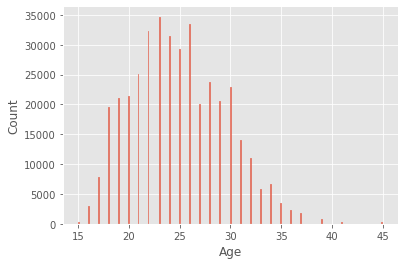

In [52]:
sns.histplot(data = jugadores, x = "Age")
plt.show()

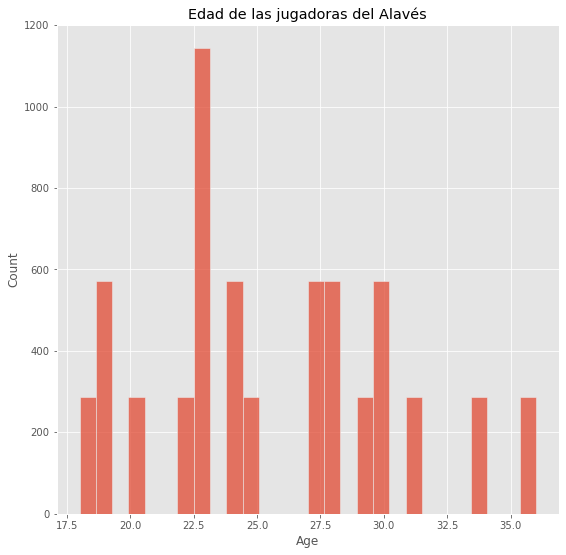

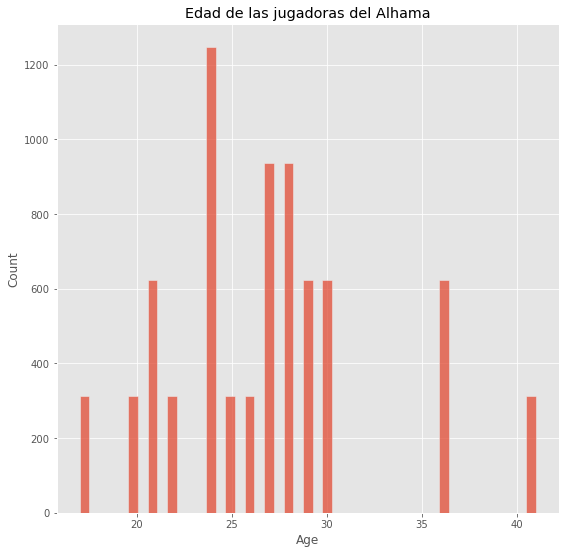

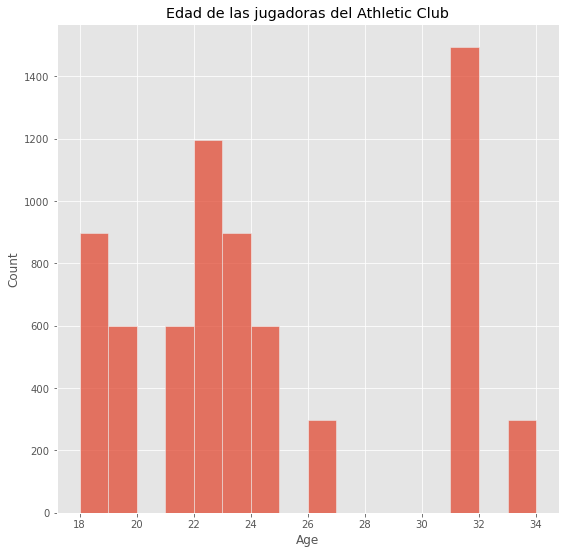

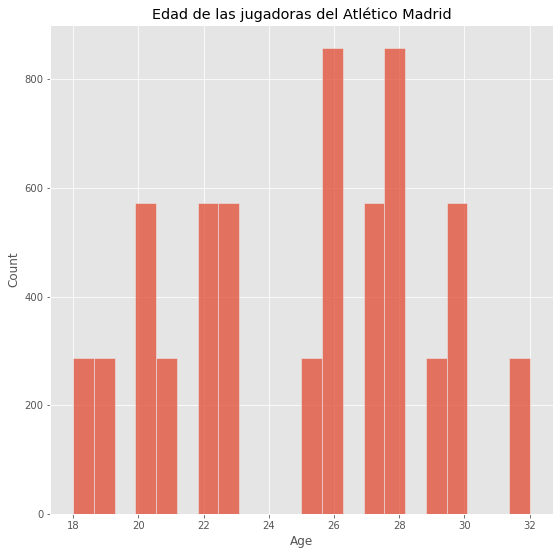

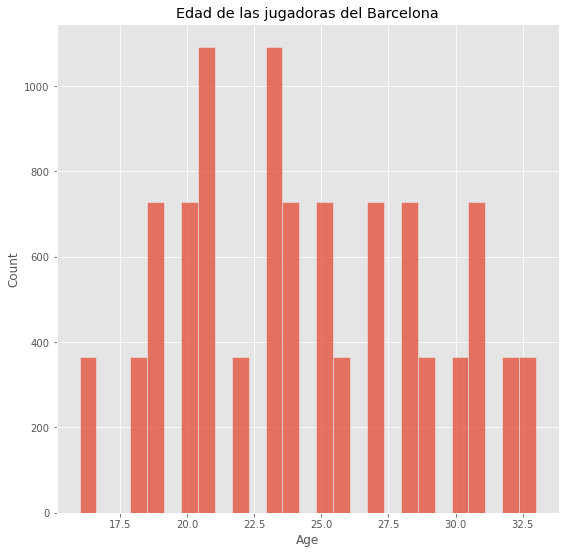

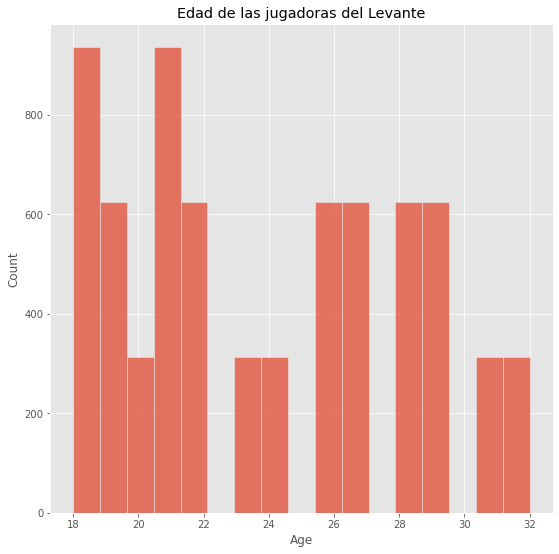

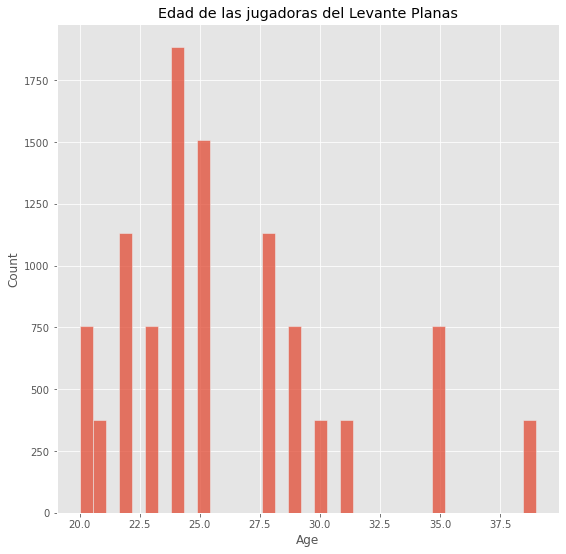

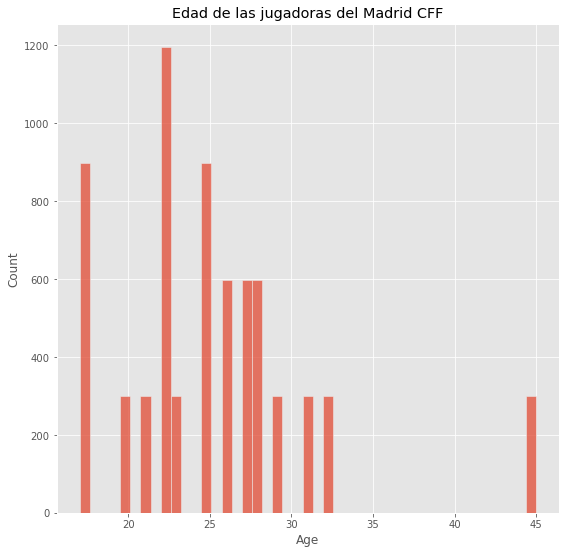

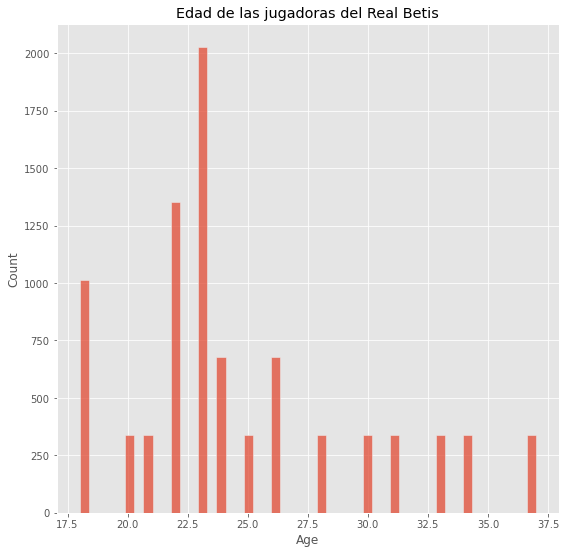

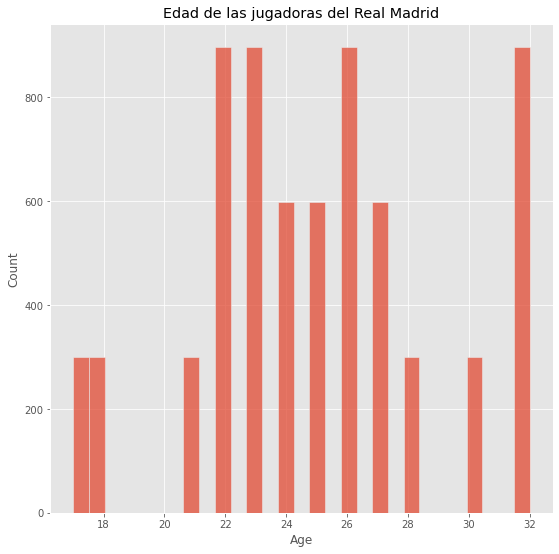

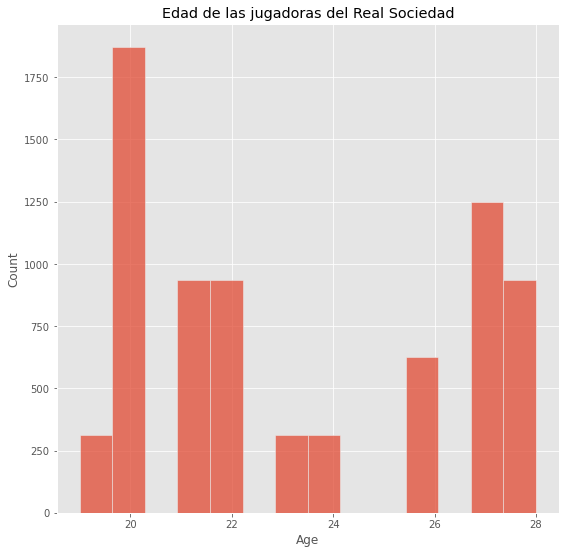

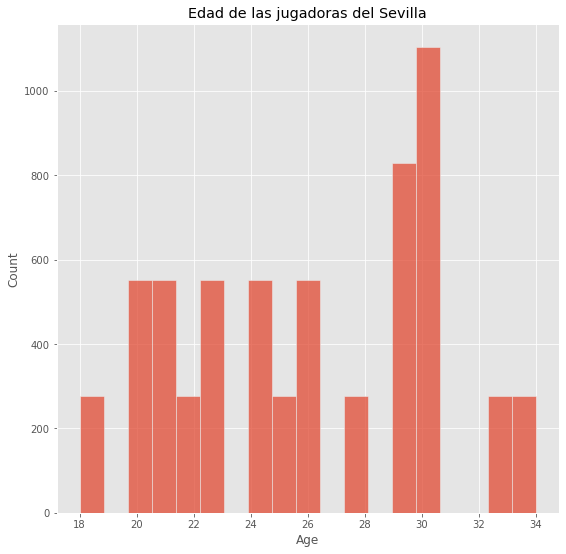

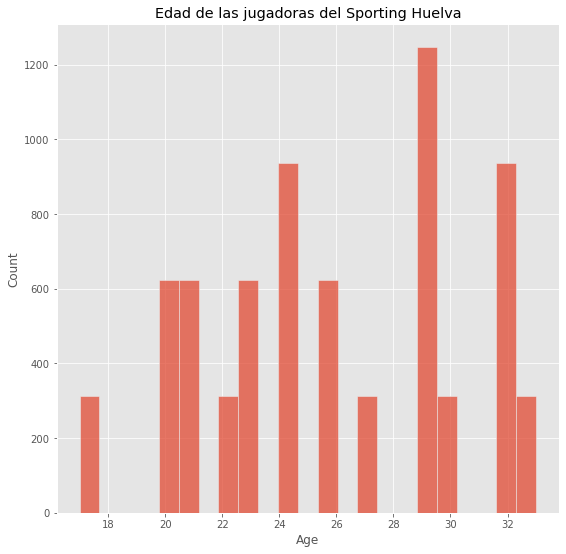

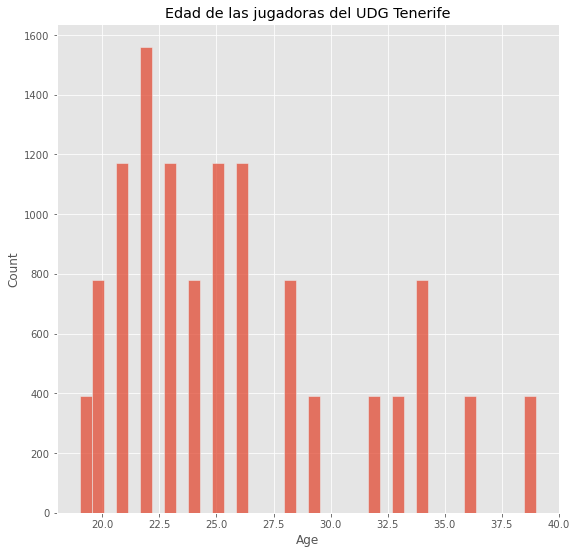

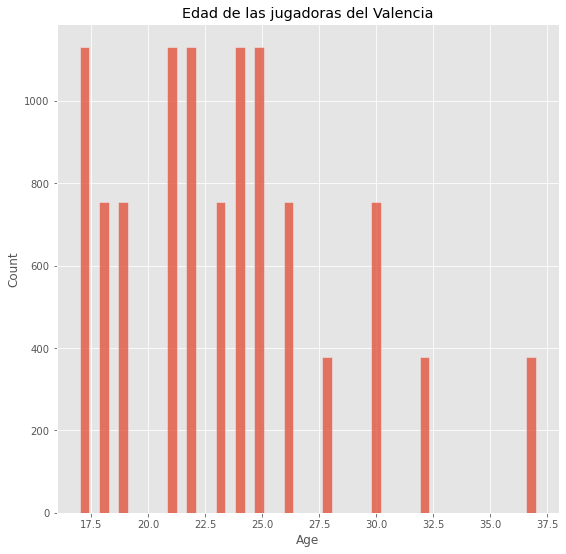

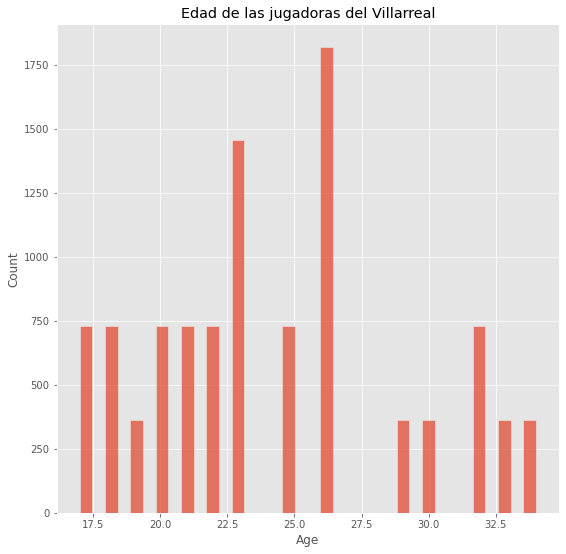

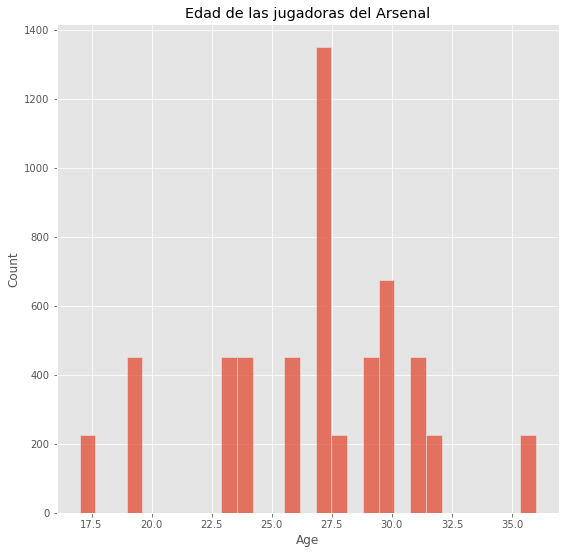

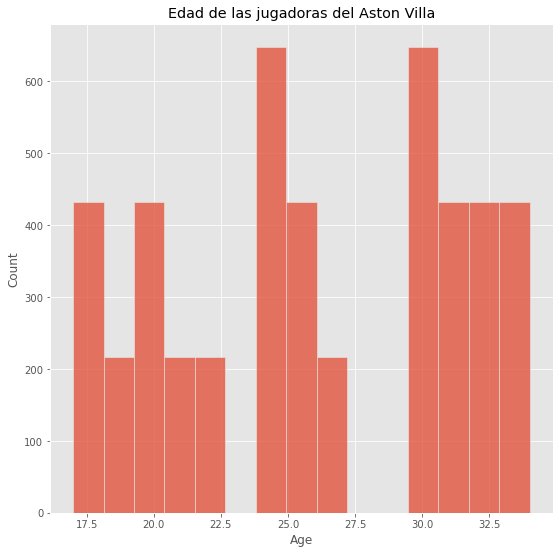

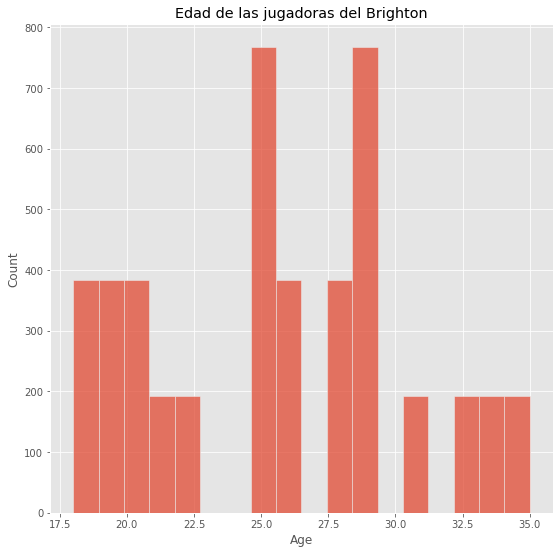

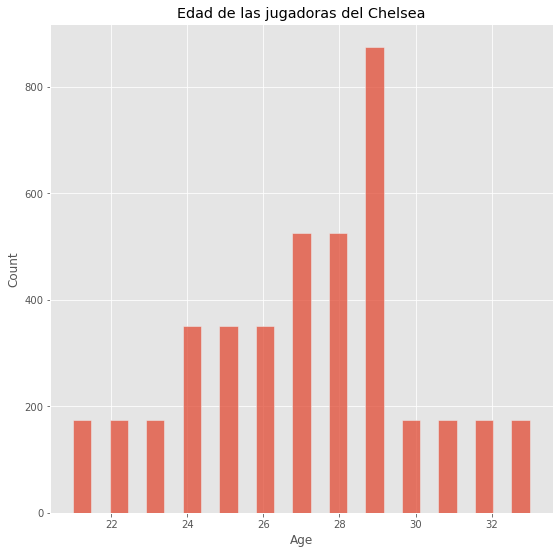

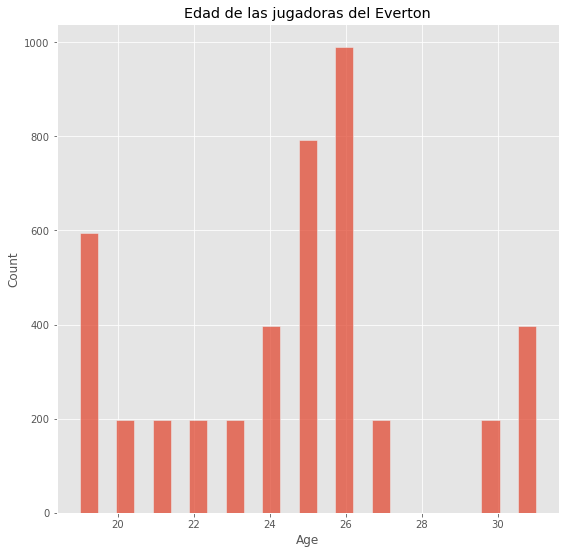

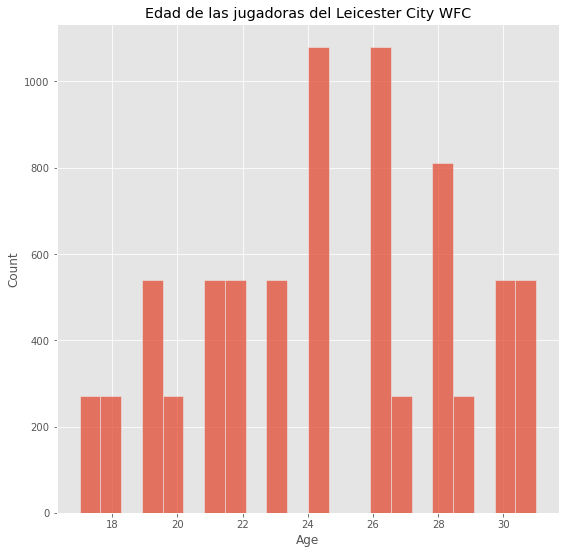

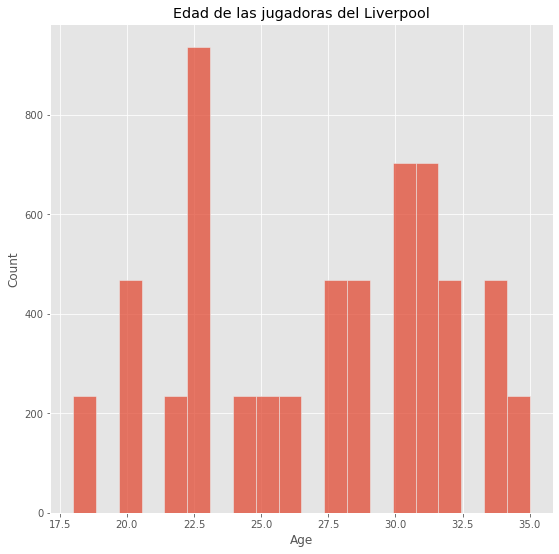

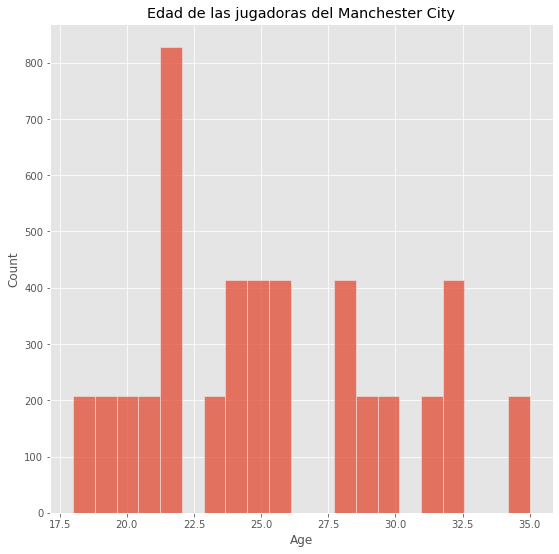

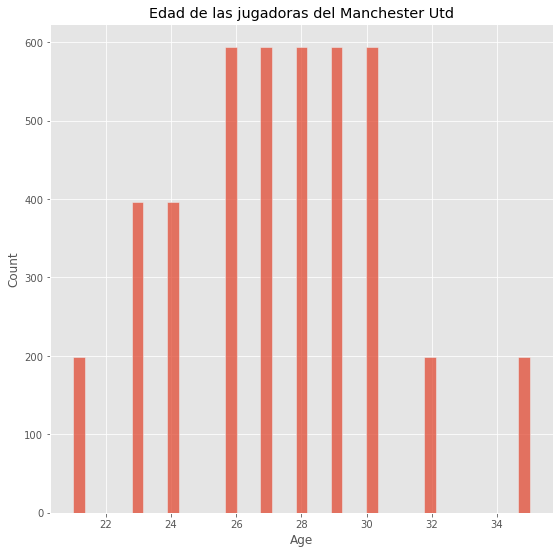

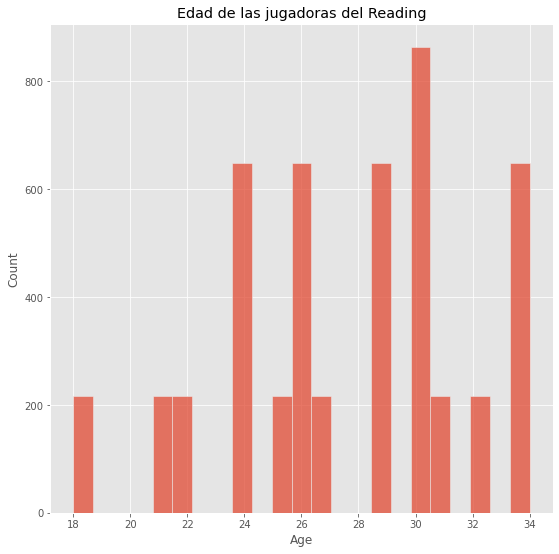

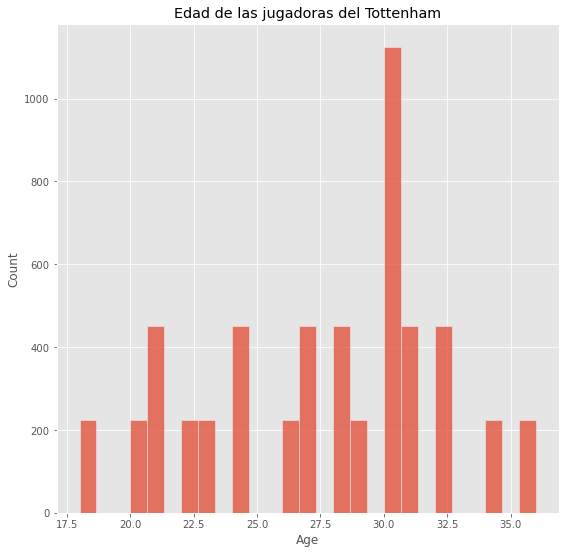

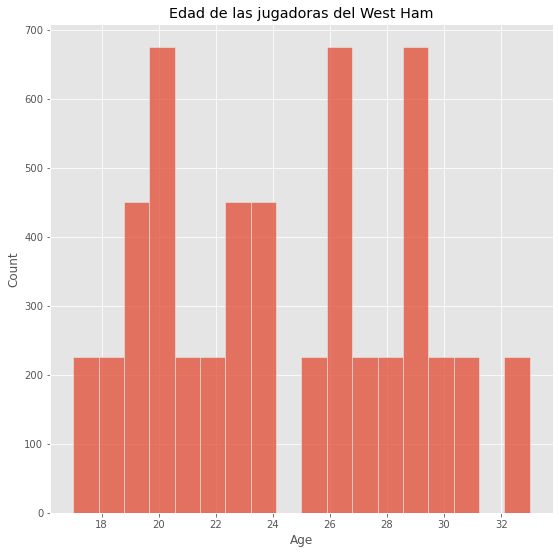

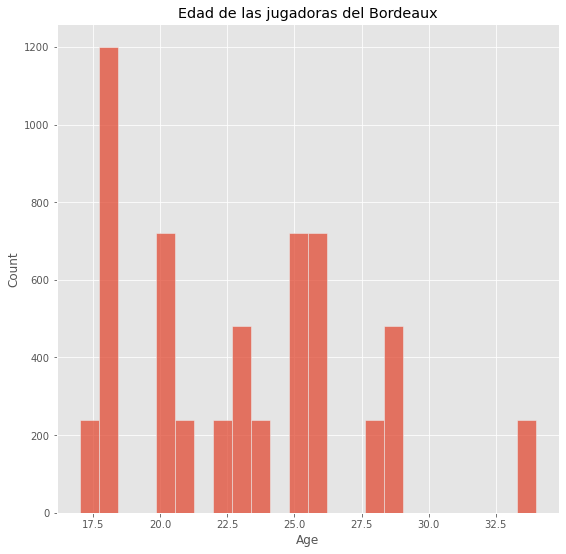

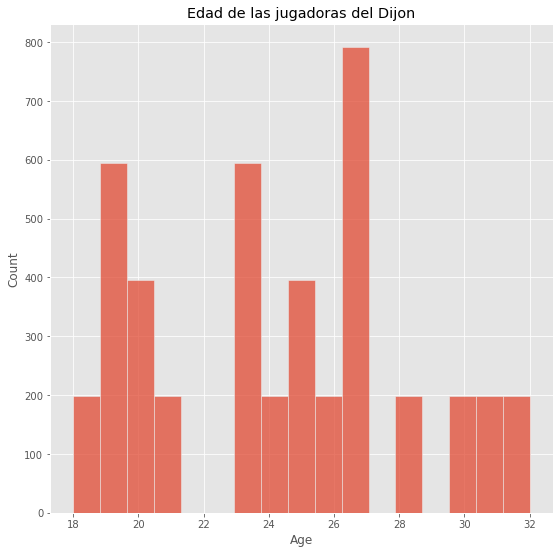

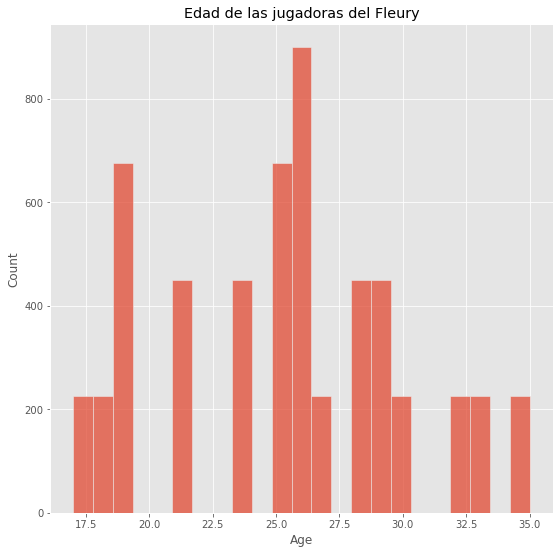

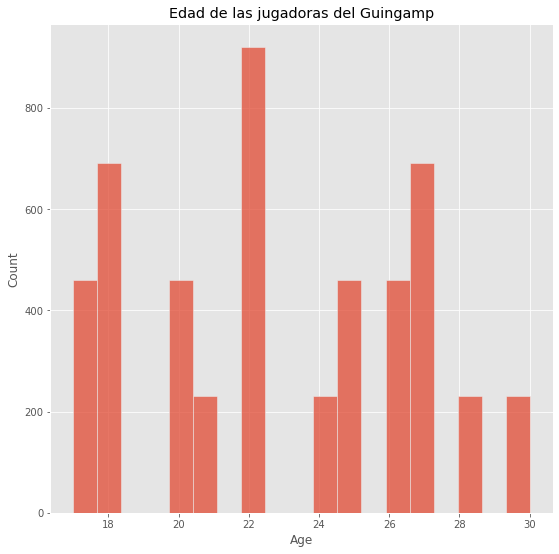

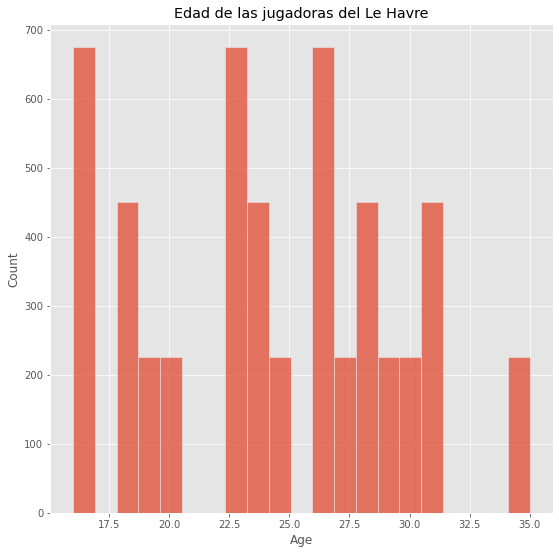

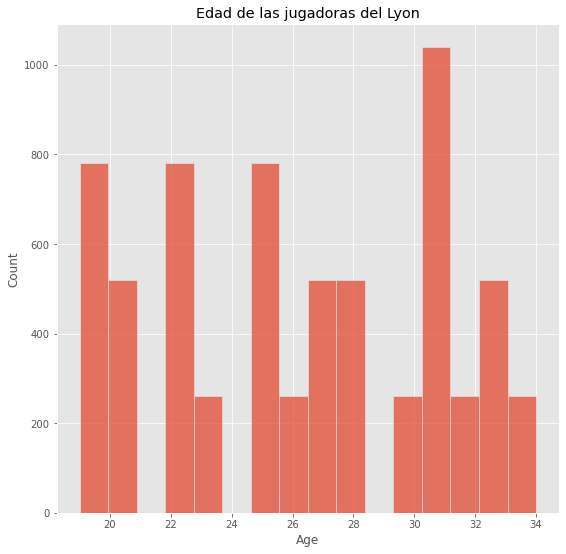

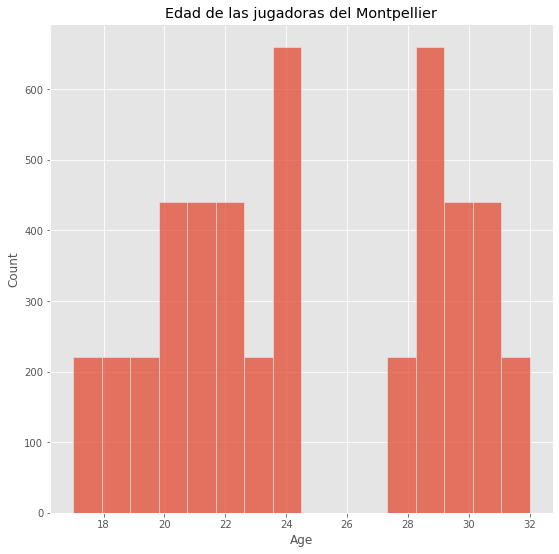

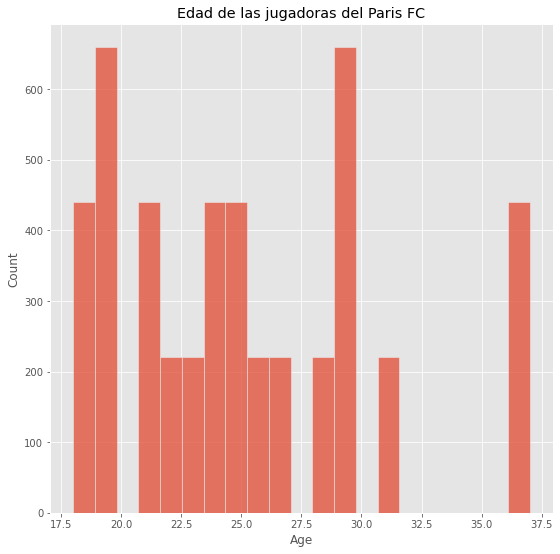

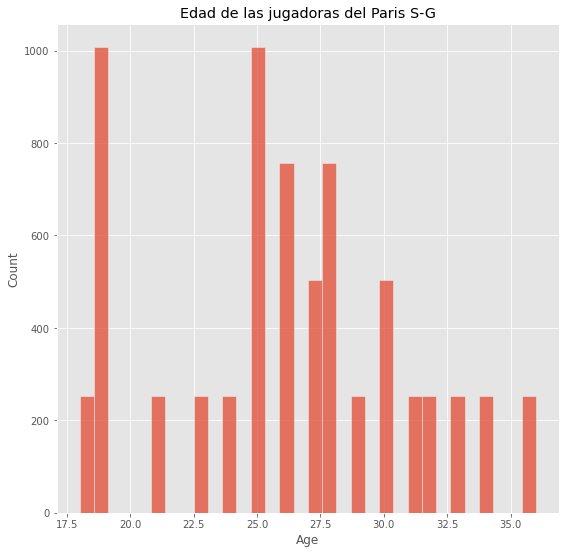

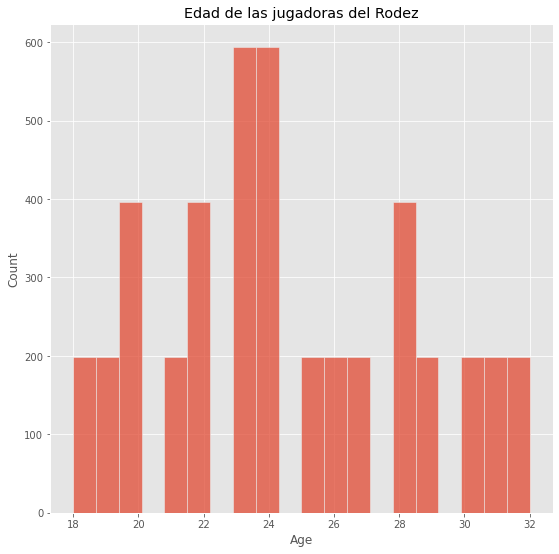

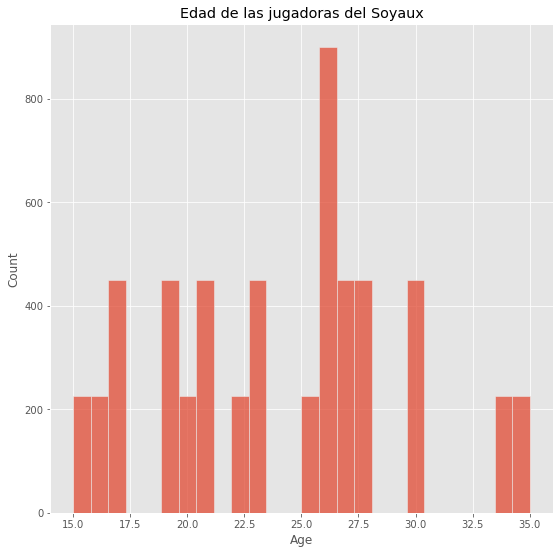

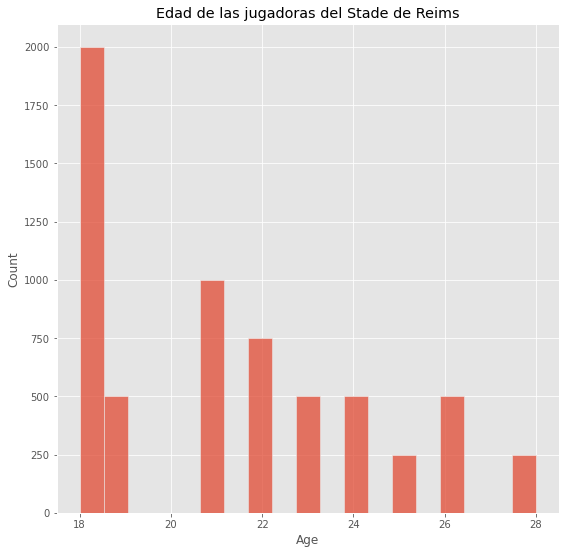

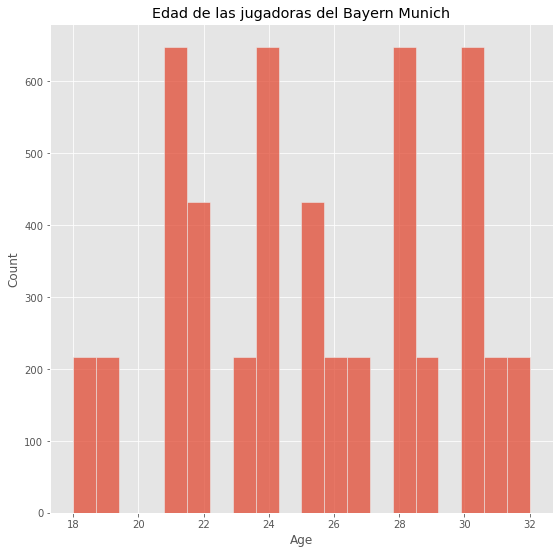

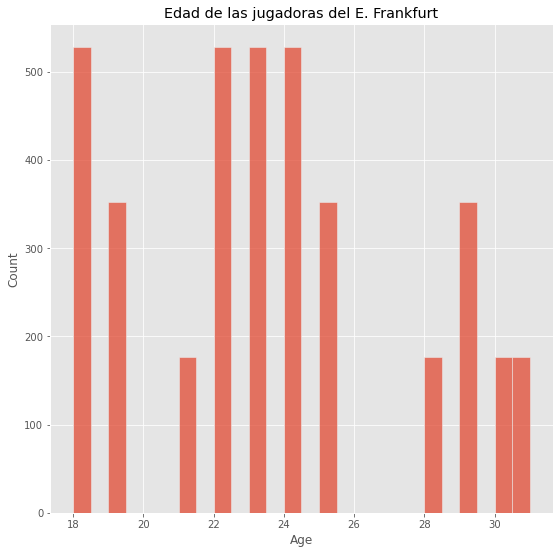

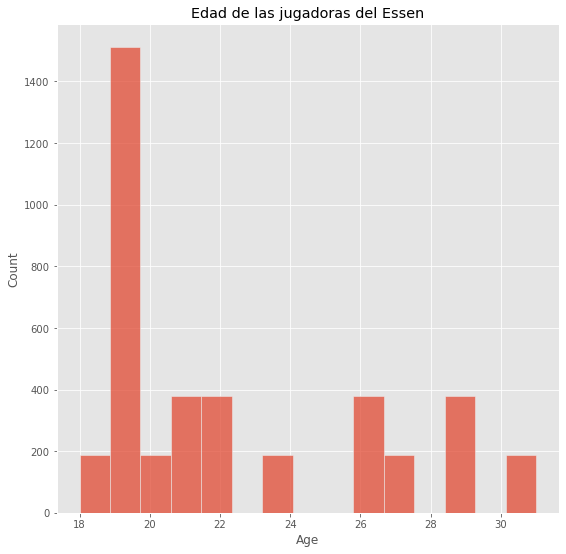

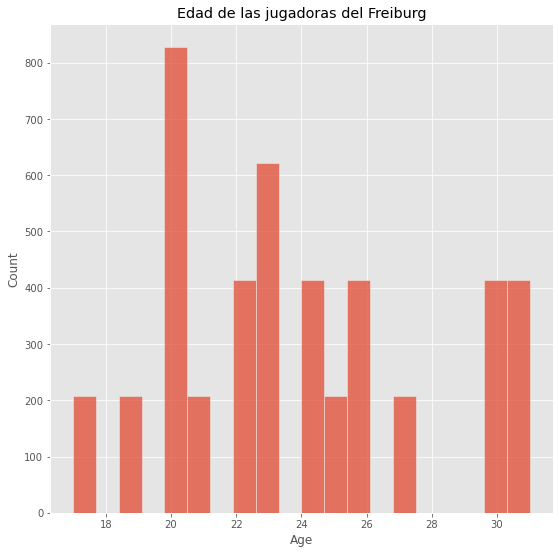

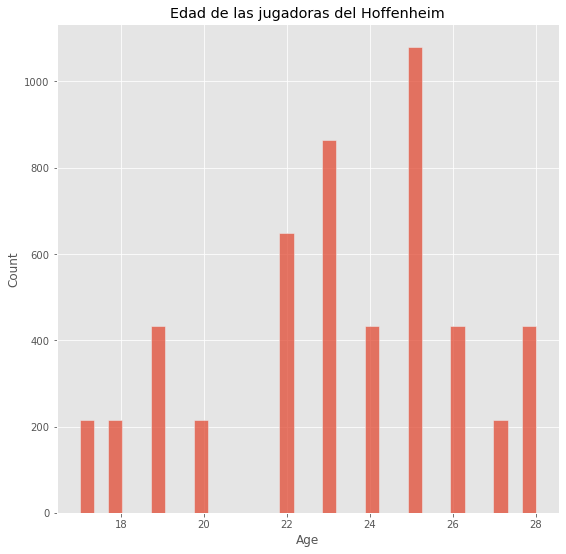

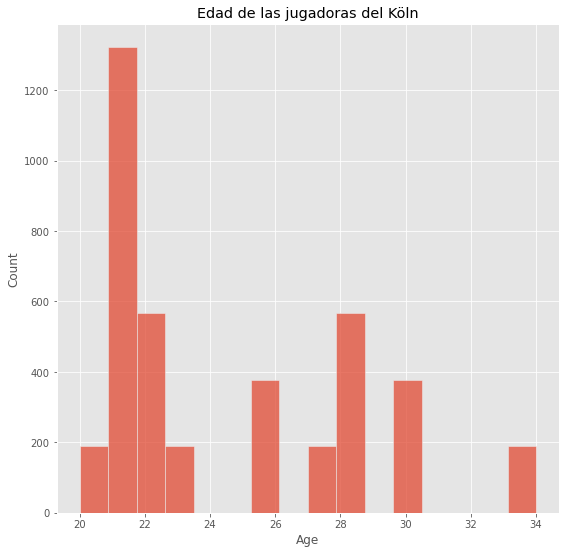

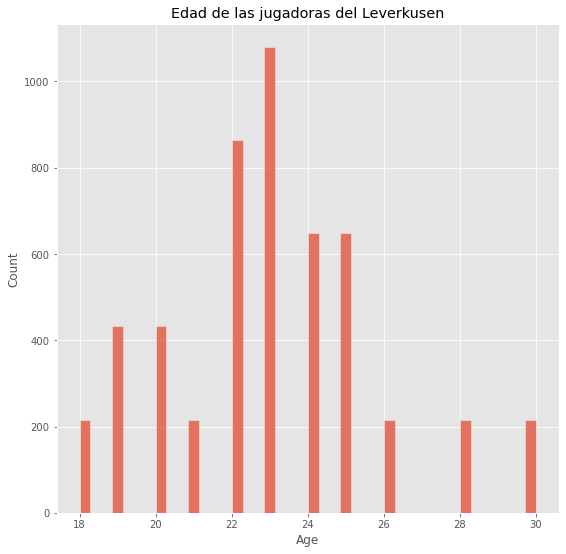

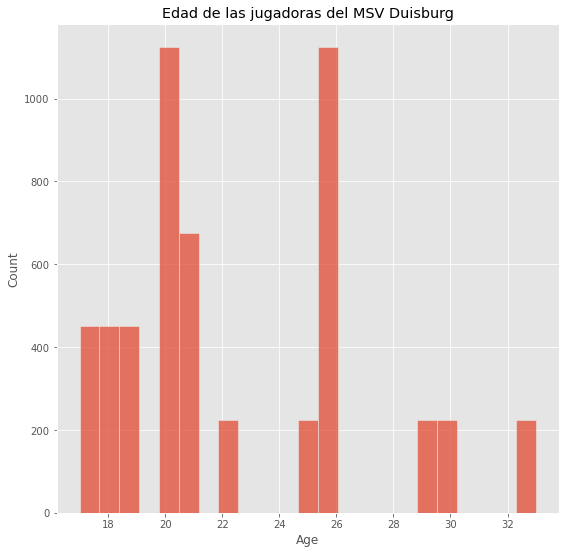

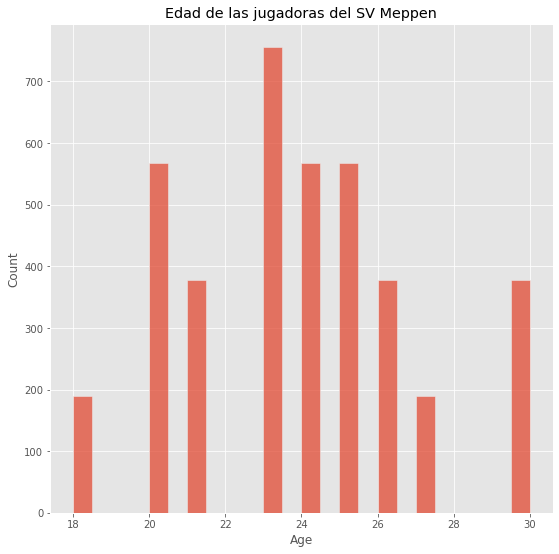

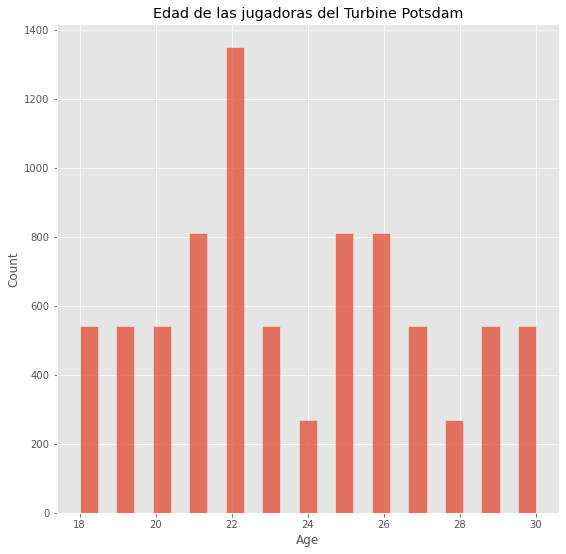

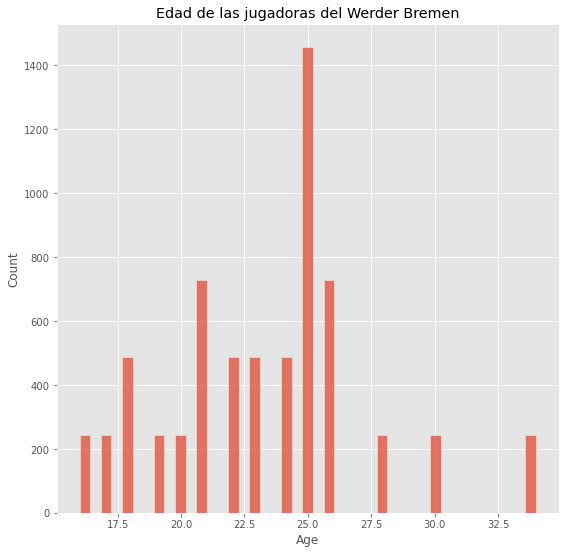

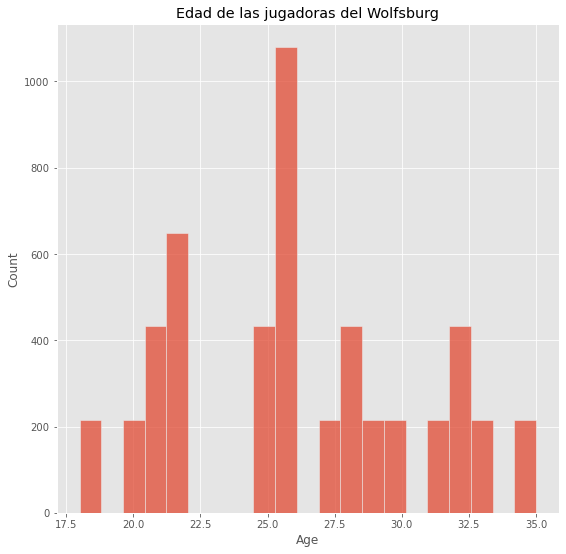

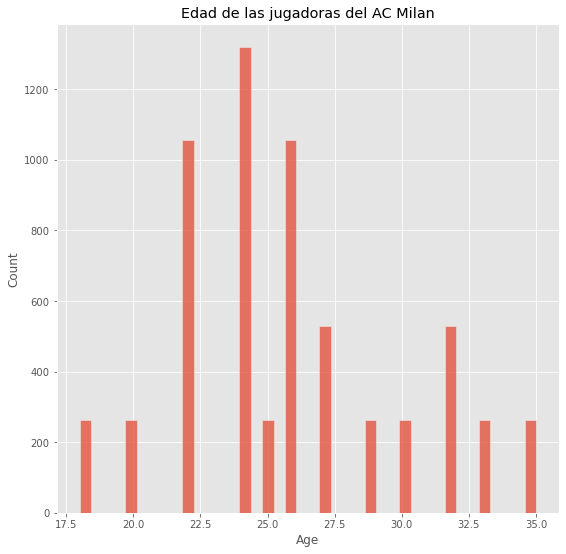

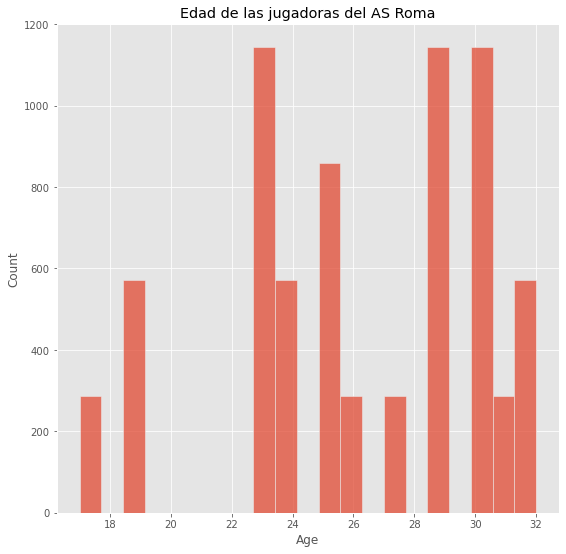

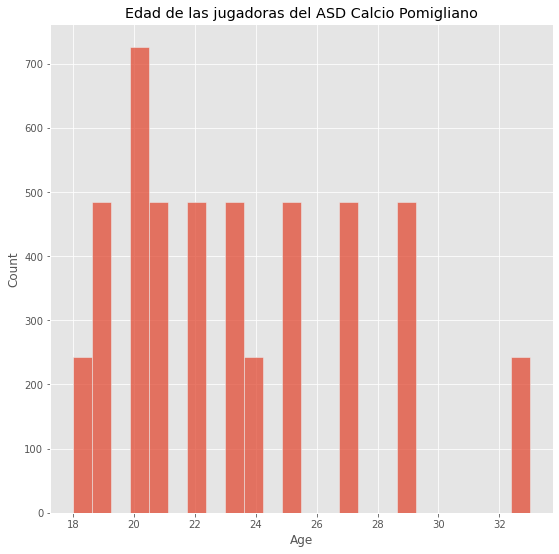

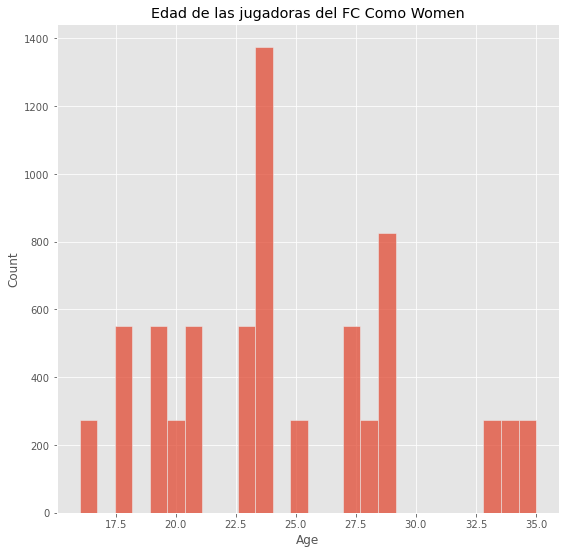

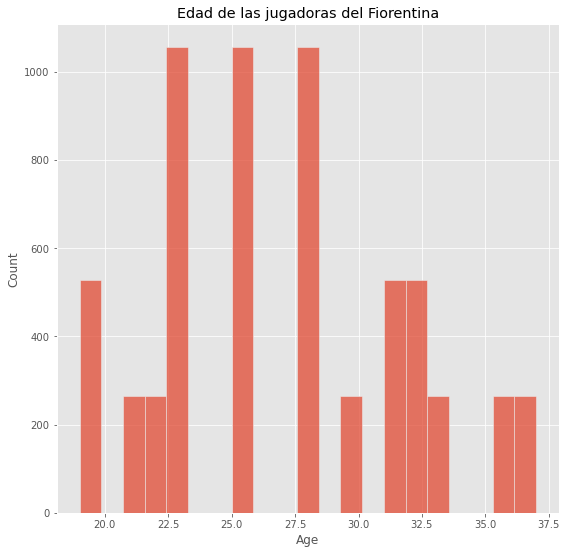

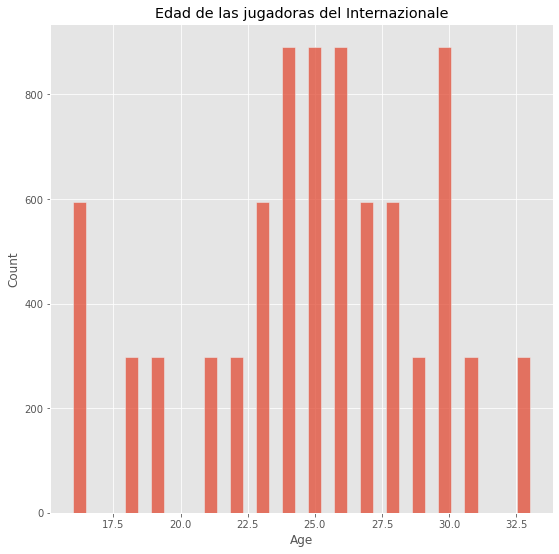

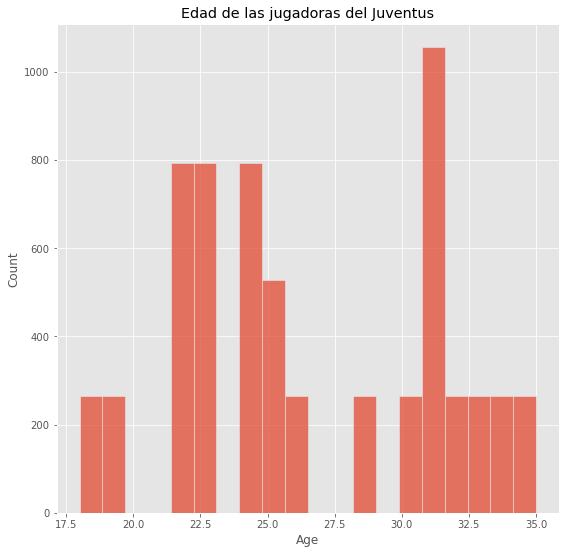

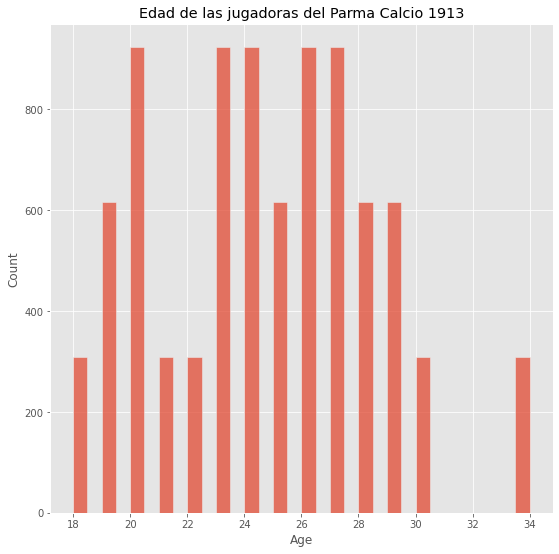

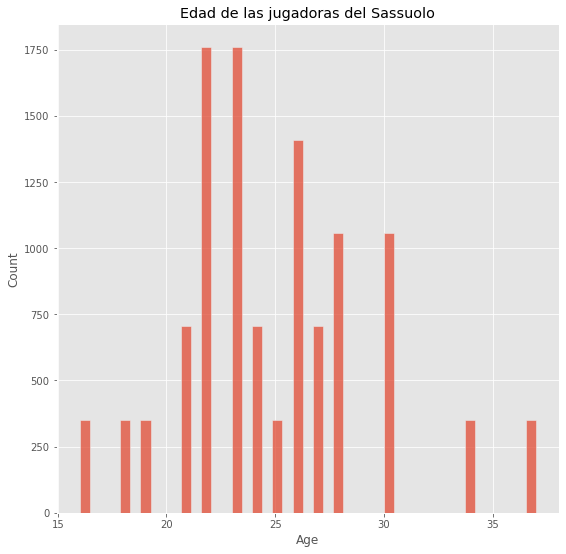

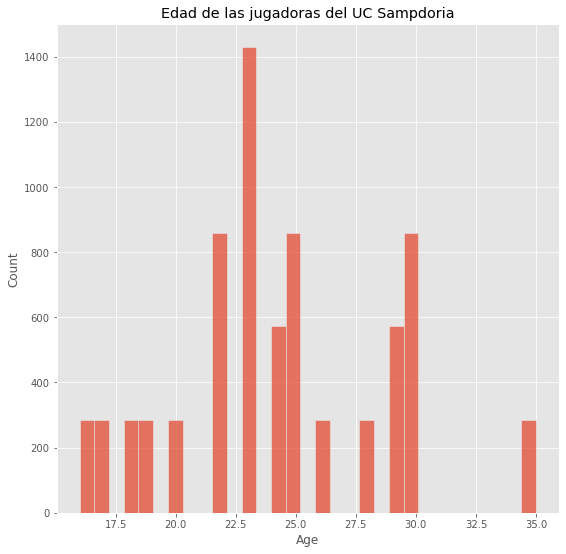

In [53]:
for x in todo_junto["Squad_id"]:
    fig, ax = plt.subplots( figsize = (9,9))
    sns.histplot(data = jugadores[jugadores["Squad_id"] == x], x = "Age")
    #print(todo_junto[todo_junto["Squad_id"] == x]["Squad"].values[0])
    plt.title("Edad de las jugadoras del " + todo_junto[todo_junto["Squad_id"] == x]["Squad"].values[0])
    plt.savefig("Edad de las jugadoras del " + todo_junto[todo_junto["Squad_id"] == x]["Squad"].values[0] + ".jpeg")
    plt.show()

In [54]:
equipo = pd.read_csv("teams_1.csv")
teams_df = equipo[['Squad_id','Squad','#Pl','Age','Poss','MP','Gls','Ast','PK','PKatt','CrdY','CrdR','Sh','Fls','Fld','Off','PKcon','OG']]
teams_df.head()

,Squad_id,Squad,#Pl,Age,Poss,MP,Gls,Ast,PK,PKatt,CrdY,CrdR,Sh,Fls,Fld,Off,PKcon,OG
0,aa11fb42,Alavés,22,27.0,43.5,26,30,18,1,1,52,1,242,276,262,56,2,4
1,e9fecaf2,Alhama,24,26.5,39.2,26,20,12,1,1,55,4,276,332,235,82,3,3
2,94929c05,Athletic Club,23,24.6,48.5,26,28,20,2,3,34,1,284,243,224,64,4,0
3,b56c2667,Atlético Madrid,22,26.2,55.1,26,46,30,3,4,36,0,343,247,273,79,4,1
4,15f49df1,Barcelona,28,27.1,69.4,25,100,69,3,5,24,0,614,217,207,104,1,0


In [55]:
matches_clean = partidos.loc[:, ["Home_id", "League_name"]].drop_duplicates()
matches_clean.columns = ["Squad_id", "League_name"]
teams_merged = teams_df.merge(matches_clean, on='Squad_id')
teams_merged.set_index('Squad_id', inplace=True)
teams_merged.columns = teams_merged.columns.str.lower()

In [56]:
teams_merged

,squad,#pl,age,poss,mp,gls,ast,pk,pkatt,crdy,crdr,sh,fls,fld,off,pkcon,og,league_name
Squad_id,,,,,,,,,,,,,,,,,,
aa11fb42,Alavés,22,27.0,43.5,26,30,18,1,1,52,1,242,276,262,56,2,4,Liga-F
e9fecaf2,Alhama,24,26.5,39.2,26,20,12,1,1,55,4,276,332,235,82,3,3,Liga-F
94929c05,Athletic Club,23,24.6,48.5,26,28,20,2,3,34,1,284,243,224,64,4,0,Liga-F
b56c2667,Atlético Madrid,22,26.2,55.1,26,46,30,3,4,36,0,343,247,273,79,4,1,Liga-F
15f49df1,Barcelona,28,27.1,69.4,25,100,69,3,5,24,0,614,217,207,104,1,0,Liga-F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
06d05f19,Internazionale,27,27.2,57.4,40,46,30,2,2,32,0,391,294,204,55,3,0,Serie-A
613577b8,Juventus,24,28.3,58.7,40,57,43,3,3,21,3,414,212,241,41,3,0,Serie-A
f7d05cb5,Parma Calcio 1913,28,26.4,45.6,40,20,13,0,4,39,0,242,291,251,68,7,0,Serie-A


In [57]:
groupby_league = teams_merged.groupby('league_name')[['gls','ast','poss']].mean()
groupby_league = groupby_league.applymap('{:.2f}'.format)
groupby_league


,gls,ast,poss
league_name,,,
Division-1-Feminine,27.42,19.67,49.99
Frauen-Bundesliga,27.08,18.92,50.06
Liga-F,40.88,27.88,50.04
Serie-A,34.50,22.00,50.00
Womens-Super-League,27.17,19.25,50.00


In [58]:
attack = teams_merged[['squad','gls','ast','poss','league_name']]
attack.set_index('squad', inplace=True)


In [59]:
attack.loc["Alhama"]

gls                20
ast                12
poss             39.2
league_name    Liga-F
Name: Alhama, dtype: object

In [60]:
team_attstats = attack.merge(groupby_league, right_on='league_name', left_on='league_name', how='left')
#team_attstats.drop('goals_league', axis=1, inplace=True)
team_attstats.index = attack.index
team_attstats.drop('league_name', axis=1, inplace=True)
team_attstats[['gls_y','ast_y','poss_y']] = team_attstats[['gls_y','ast_y','poss_y']].astype(float)
team_attstats.head()

,gls_x,ast_x,poss_x,gls_y,ast_y,poss_y
squad,,,,,,
Alavés,30,18,43.5,40.88,27.88,50.04
Alhama,20,12,39.2,40.88,27.88,50.04
Athletic Club,28,20,48.5,40.88,27.88,50.04
Atlético Madrid,46,30,55.1,40.88,27.88,50.04
Barcelona,100,69,69.4,40.88,27.88,50.04


In [61]:
estatsEq = team_attstats.loc["Alhama", ["gls_x", "ast_x", "poss_x"]]
#estatsEq["Tipo"] = "Equipo"
estatsAvg = team_attstats.loc["Alhama", ["gls_y", "ast_y", "poss_y"]]
estatsAvg.index = ["gls_x", "ast_x", "poss_x"]
estatsAvg.name = "2"
#estatsAvg["Tipo"] = "Media"

In [62]:
estatsAvg.name

'2'

In [63]:
nuevo = pd.concat([pd.DataFrame(estatsEq).T, pd.DataFrame(estatsAvg).T], axis = 0)
nuevo["Tipo"] = ["Equipo", "Media"]

In [64]:
nuevo

,gls_x,ast_x,poss_x,Tipo
Alhama,20.00,12.00,39.20,Equipo
2,40.88,27.88,50.04,Media


<AxesSubplot:ylabel='gls_x'>

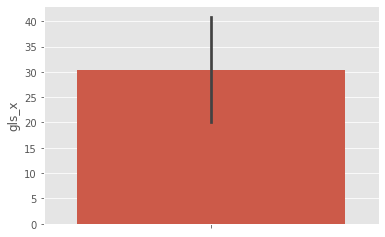

In [65]:
sns.barplot(data = nuevo, y = "gls_x", hue = "Tipo")

In [66]:
team_attstats = team_attstats.loc["Alhama"]

In [67]:
team_attstats

gls_x     20.00
ast_x     12.00
poss_x    39.20
gls_y     40.88
ast_y     27.88
poss_y    50.04
Name: Alhama, dtype: float64

In [68]:
for team in team_attstats.index:
    team_attack = team_attstats.loc[team, ['gls_x','ast_x','poss_x']]
    team_attack2 = team_attstats.loc[team, ['gls_y','ast_y','poss_y']]
    plt.figure()
    pos = list(range(len(team_attack)))
    plt.bar(pos, team_attack, width=0.25, alpha=0.5, color='blue', label=f'{team}')
    plt.bar([p + 0.25 for p in pos], team_attack2, width=0.25, alpha=0.5, color='gray', label='Liga')
    plt.xticks(range(3), ['Goles','Asistencias','Posesión'])
    plt.legend()
    plt.title(f'{team}')
    plt.savefig(f'Comparacion{team}.jpg')

IndexingError: Too many indexers